In [83]:
from datetime import datetime
import pandas as pd
import numpy as np

DJIA = pd.read_csv('../DJIA.csv')

In [199]:
DJIA_Series = DJIA.loc[:,'VALUE'].replace('.', np.nan).apply(np.float64)
DJIA_Series.index = pd.to_datetime(DJIA.loc[:,'DATE'])

In [200]:
paychecks = pd.read_csv('../paychecks.csv', names=['Paycheck'])
paychecks.index = pd.date_range(start='3/13/2008', end='1/20/2012', freq="WOM-3FRI" ).union(pd.date_range(start='3/13/2008', end='1/13/2012', freq="WOM-1FRI" ))

In [201]:
finances = pd.read_csv('../finances.csv')
finances.index = pd.period_range("1978-09", "1999-06", freq="Q-JUN")

In [202]:
traffic = pd.read_csv('../website_traffic.csv')
enter_obj = pd.to_datetime(traffic.loc[:,'ENTER'])
leave_obj = pd.to_datetime(traffic.loc[:,'LEAVE'])
traffic_Series = leave_obj - enter_obj
daily_average = traffic_Series.mean()
traffic_df = pd.DataFrame({'DURATION': traffic_Series, 'COUNT': np.ones(shape=len(traffic_df))})
traffic_df.index = enter_obj
total_vph_Series = traffic_df.resample('H').sum()

In [203]:
daily_net_Series = DJIA_Series.shift(1) - DJIA_Series
largest_daily_gain = daily_net_Series.max()
largest_daily_loss = daily_net_Series.min()
monthly_net_Series = daily_net_Series.resample('M').sum()
largest_monthly_gain = monthly_net_Series.max()
largest_monthly_loss = monthly_net_Series.min()

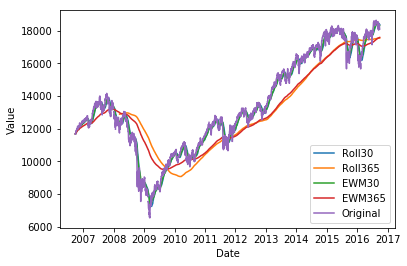

In [226]:
import matplotlib.pyplot as plt

Roll30 = DJIA_Series.dropna().rolling(window=30).mean()
Roll365 = DJIA_Series.dropna().rolling(window=365).mean()
EWM30 = DJIA_Series.dropna().ewm(span=30).mean()
EWM365 = DJIA_Series.dropna().ewm(span=365).mean()

plt.plot(Roll30.index, Roll30, label='Roll30')
plt.plot(Roll365.index, Roll365, label='Roll365')
plt.plot(EWM30.index, EWM30, label='EWM30')
plt.plot(EWM365.index, EWM365, label='EWM365')
plt.plot(DJIA_Series.index, DJIA_Series, label='Original')

plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')
plt.show()